# Lab 3: Classification

**Bài tập rèn luyện khả năng sử dụng thuật toán Decision tree vào bộ dữ liệu chữ số MNIST.**

Cập nhật lần cuối: 28/02/2021 

Họ tên: Lê Thái Bình Minh

MSSV: 19120583

## Quy định cách làm bài và nộp bài

&#127827; *Trong bài tập này, các bạn chỉ được phép sử dụng các thư viện Standard Python Library, numpy, pandas, matplotlib. Các thư viện hỗ trơ (đặc biệt là thư viện Sklearn) là không được phép. Thư viện Sklearn chỉ được dùng trong phần huấn luyện mô hình cây quyết định (mình sẽ nói rõ ở phần đó)*

&#127802; Sinh viên lưu ý mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file Python notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:

```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```

Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng hoàn toàn.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).


Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

Bạn có thể thảo luận ý tưởng với bạn khác hoặc từ các nguồn khác, nhưng code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn. Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All` để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 123 thì bạn đặt tên thư mục là `123`)
    - File `Lab3 - scratch.ipynb` 
    - File `Lab3 - mnist.ipynb` 
- Các bạn nén lại MSSV.zip (*.zip chứ không phải .rar hay gì khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. <font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài.</font>

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 

# Đọc dữ liệu 

- Dữ liệu được đọc từ file mnist_train.csv và mnist_test.csv
- Sinh viên đọc mô tả dữ liệu từ link: https://www.kaggle.com/oddrationale/mnist-in-csv
- Dữ liệu lần được lưu vào các biến:

train_X: dữ liệu trong tập huấn luyện

train_y: nhãn của tập huấn luyện

test_X: dữ liệu trong tập kiểm tra

test_y: nhãn của tập kiểm tra

**Lưu ý, các biến cần được chuyển về dạng numpy array.**

In [4]:
train_X = None
train_y = None
test_X = None
test_y = None

# YOUR CODE HERE
def load_data(data_path):
    data = pd.read_csv(data_path) 
    data = data.values 
    x = data[:,1:]
    y = data[:,0] 
    return x, y
    
train_X, train_y = load_data("mnist_train.csv")
test_X, test_y = load_data("mnist_test.csv")

In [5]:
# Kiểm tra kích thước của dữ liệu đã chính xác chưa
assert (train_X.shape == (60000, 784))
assert (train_y.shape == (60000,))
assert (test_X.shape == (10000, 784))
assert (test_y.shape == (10000,))

In [6]:
# TEST
assert type(train_X) == np.ndarray
assert type(train_y) == np.ndarray
assert type(test_X) == np.ndarray
assert type(test_y) == np.ndarray

# Khám phá dữ liệu

## Biểu diễn dữ liệu

- Ta sẽ biểu diễn hình ảnh và nhãn tương ứng, từ tập dữ liệu huấn luyện (training). 
- Điều này cho ta một số lợi ích như: có cái nhìn tổng quan về dữ liệu và đảm bảo rằng dữ liệu được gắn nhãn chính xác.

Do môn học của chúng ta không đặt nặng vấn đề xử lý ảnh, nên phần biểu diễn dữ liệu, mình sẽ giúp các bạn - với điều kiện phần Đọc dữ liệu bên trên các bạn phải đọc đúng :')

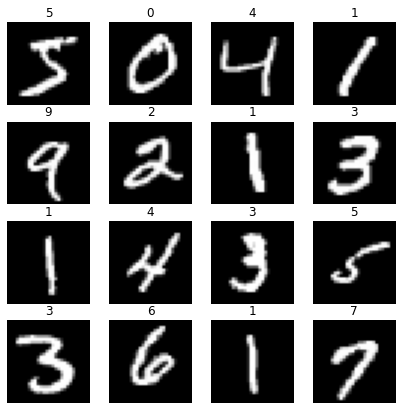

In [7]:
plt.figure(figsize=(7, 7))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
        
    image = train_X[i].reshape((28, 28))

    plt.imshow(image.astype("uint8"), cmap='gray')

    plt.title(train_y[i])
    plt.axis("off")

## Số lượng hình ảnh mỗi lớp trong dữ liệu có cân bằng (balance) hay không?

- Số lượng các lớp trong dữ liệu là gì? Ví dụ: có bao nhiêu hình ảnh có nhãn là 0, có bao nhiêu có nhãn là 1. 
- Tại sao ta cần khám phá câu hỏi này? Trong quá trình huấn luyện các mô hình học máy, để cho mô hình có thể học tốt nhất, thì số lượng hình ảnh của mỗi lớp nên bằng với nhau. 

---------------------------
- Ta sẽ đếm số lượng hình ảnh của mỗi lớp **trong tập dữ liệu huấn luyện** và lưu vào 1 dictionary có tên là: sample_count_per_class. Với định dạng mẫu: <br />
{ <br />
'0': số lượng hình ảnh có nhãn là 0,  <br />
'1': số lượng hình ảnh có nhãn là 1,  <br />
...  <br />
'9': số lượng hình ảnh có nhãn là 9  <br />
}

In [8]:
sample_count_per_class = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0}

# YOUR CODE HERE
for i in range(len(train_y)):
    sample_count_per_class[str(train_y[i])]+=1

In [9]:
# TEST
assert sample_count_per_class == {'0': 5923, '1': 6742, '2': 5958, '3': 6131, '4': 5842, '5': 5421, \
                                  '6': 5918, '7': 6265, '8': 5851, '9': 5949}

- Có vẻ dữ liệu của mỗi lớp cân bằng với nhau (xấp xỉ 5000 ~ 6000) <br />
=> Thích hợp cho việc huấn luyện

- Để trực quan hơn nữa, chúng ta sẽ biểu diễn bên dưới thông qua hình ảnh. (mình cũng sẽ giúp các bạn phần này, các bạn chỉ cần chạy đoạn code bên dưới là được)

<BarContainer object of 10 artists>

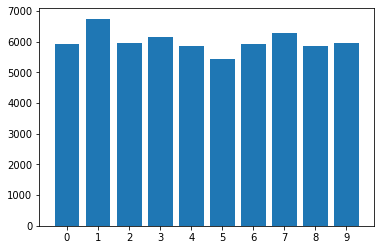

In [10]:
plt.bar(sample_count_per_class.keys(), sample_count_per_class.values())

# Chuẩn bị dữ liệu

## Tiền xử lý dữ liệu - chuẩn hóa dữ liệu về khoảng [0, 1]
- Đối với dữ liệu dạng ảnh nói riêng và nhiều dữ liệu khác nói chung, một cách phổ biến để xử lý dữ liệu và chuyển giá trị về khoảng [0, 1]. Phương pháp này còn được gọi là normalization. Với phương pháp tiền xử lý này, ta có thể cải thiện độ chính xác lên rất nhiều.

- Công thức là:
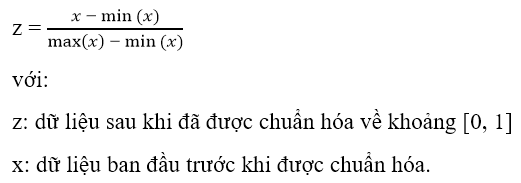

- Nhiệm vụ của sinh viên, hoàn thành hàm *normlize_image*. Lưu ý: kết quả trả về của hàm normalize_image là 1 numpy array có kiểu dữ liệu là np.float32

In [11]:
def normalize_image(image):
    """
    The function nomalize a single image to range [0.0, 1.0]
    
    * parameter:
    - image: a numpy array, which is our input image.
    
    * return:
    - norm_image: the result image after normalize, a numpy array - with dtype is np.float32
    """
    
    # YOUR CODE HERE
    
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    norm_image = norm_image.astype('float32')
    
    return norm_image

In [12]:
# TEST
assert (normalize_image(np.array([0, 127.5, 255])) == np.array([0.0 , 0.5, 1.0], dtype=np.float32)).all() == True

- Sau khi đã viết thành công hàm normalize_image. Sinh viên áp dụng hàm normalize_image, để viết hàm normalize_data. 
- Hàm normalize_data, có nhiệm vụ thực hiện normalize toàn bộ dữ liệu.

In [13]:
def normalize_data(images):
    """
    Function perform nomalization in the whole dataset
    
    * Parameter: 
    - images: numpy array, with dimension (n, image_size)
    
    * Return:
    - norm_images: numpy array, the whole images, which is normalized.
    """
    
    norm_images = images.copy()
    
    # YOUR CODE HERE
    for i in range(len(images)):
        norm_images[i] = normalize_image(np.array(images[i]))
    norm_images = norm_images.astype('float32')
    return norm_images

- Sau đó, ta dùng hàm *normalize_data* để thực hiện normalize toàn bộ dữ liệu trong tập huấn luyện (biến train_X). Kết quả được lưu vào biến train_X_norm. (Mình đã thực hiện cho các bạn bên dưới) - với điều kiện hàm normalize_data của các bạn phải chính xác :').

In [14]:
# Thực hiện normalize trên toàn bộ dữ liệu huấn luyện
train_X_norm = normalize_data(train_X)

In [15]:
# TEST
assert train_X_norm.shape == (60000, 784)
assert train_X_norm.dtype == np.float32
assert train_X_norm.max() == 1.0
assert train_X_norm.min() == 0.0

## Tiền xử lý dữ liệu - chuyển nhãn về dạng one-hot vector

- Chuyển về dạng one-hot vector là gì?
Ví dụ: dữ liệu của ta gồm các nhãn [0, 1, 2]. Thay vì để các số 0, 1, 2 cho mô hình dự đoán. Người ta có xu hướng chuyển về dạng vector như sau: [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

- Ở đây, mình sẽ không giải thích cụ thể tại sao lại chuyển về dạng one-hot vector. Nói một cách đơn giản, chuyển về dạng one-hot vector sẽ giúp cho mô hình học tốt hơn và đạt được độ chính xác cao hơn.

- Nhiệm vụ của sinh viên là hoàn thành hàm *one_hot_encoding*

In [16]:
def one_hot_encoding(label, num_classes=10):
    """
    Function convert label into one-hot vector
    
    * Parameter:
    - label: a number, indicate a label
    - num_classes: a number, indicate a number of class. In this project, we have 10 classes from 0 to 9.
    
    * Return:
    - one_hot_label: numpy array, the label after convert to one-hot vector
    """
    
    one_hot_label = None
    
    # YOUR CODE HERE
    one_hot_label = [0]*num_classes
    one_hot_label[label] = 1
    
    return one_hot_label

In [17]:
# TEST
assert (one_hot_encoding(0) == np.array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])).all() == True
assert (one_hot_encoding(5) == np.array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])).all() == True

- Sau khi đã viết thành công hàm one_hot_encoding. Sinh viên áp dụng hàm one_hot_encoding để viết hàm one_hot_encoding_labels.

- Hàm *one_hot_encoding_labels* có nhiệm vụ chuyển toàn bộ nhãn về dạng one hot vector.

In [18]:
def one_hot_encoding_labels(labels, num_classes=10):
    """
    Function perform one hot encoding in the whole label
    
    * Parameter:
    - labels: numpy array, labels before one-hot, with shape (n,)
    
    * Return:
    - one_hot_labels: numpy array, labels after perform one-hot encoding, with shape (n, num_classes)
    """
    
    one_hot_labels = None
    
    # YOUR CODE HERE
    one_hot_labels = [None for _ in range(len(labels))]

    for i in range(len(labels)):
        one_hot_labels[i] = one_hot_encoding(labels[i])

    
    
    return np.array(one_hot_labels)

- Sau khi đã viết xong hàm *one_hot_encoding labels*, ta thực hiện one-hot encoding trên toàn bộ nhãn của tập huấn luyện. Kết quả sẽ được lưu vào biến **train_y_one_hot**.
- Đoạn code bên dưới, mình đã thực hiện giúp các bạn, với điều kiện hàm one_hot_encoding_labels phải được thực hiện đúng. :')

In [19]:
train_y_one_hot = one_hot_encoding_labels(train_y)

In [20]:
assert train_y_one_hot.shape == (60000, 10)
assert train_y_one_hot.max() == 1.0
assert train_y_one_hot[0].sum() == 1.0

# Cài đặt và huấn luyện thuật toán Decision tree 

- Trong phần này, sinh viên cài đặt thuật toán Decision Tree và sử dụng để huấn luyện với bộ dữ liệu mnist vừa được xử lý bên trên.
- Sinh viên được phép sử dụng hàm *DecisionTreeClassifier* của thư viện Sklearn bằng khai báo 

```python
from sklearn.tree import DecisionTreeClassifier
```

- Các thuộc tính liên quan, sinh viên cần khai báo gồm:
criterion: entropy <br />
random_state: 100 <br />
max_depth: 10 <br />
min_samples_leaf: 5 <br />

- Sinh viên có thể tham khảo link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [21]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
def decisionTree(X, Y, v_criterion = 'entropy', v_random_state=100, v_max_depth=10, v_min_samples_split=5):
    clf = DecisionTreeClassifier(criterion=v_criterion, random_state=v_random_state, max_depth=v_max_depth, min_samples_split=v_min_samples_split)
    clf = clf.fit(X,Y)
    
    return clf 

- Đến đây chúng ta đã sẵn sàng để huấn luyện mô hình Cây quyết định (Decision tree).
- Mô hình cây quyết định được lưu vào biến **tree**

In [22]:
tree = None

# YOUR CODE HERE
tree = decisionTree(train_X_norm, train_y_one_hot)

# Kiểm tra độ chính xác

- Sau khi đã huấn luyện thành công mô hình Cây quyết định, chúng ta sẽ kiểm tra độ chính xác của mô hình trên tập dữ liệu kiểm tra (testing dataset).

## Tiền xử lý và dự đoán trên tập dữ liệu kiểm tra. 

- Lưu ý, để thực hiện dự đoán trên tập dữ liệu kiểm tra, chúng ta cũng phải thực hiện bước tiền xử lý dữ liệu: normalization đối với test_X. Kết quả lưu vào biến **test_X_norm**. Gợi ý: các bạn chỉ cần gọi lại hàm được viết bên trên là được.

In [23]:
test_X_norm = None

# YOUR CODE HERE
test_X_norm = normalize_data(test_X)

In [24]:
# TEST
assert test_X_norm.shape == (10000, 784)
assert test_X_norm.max() == 1.0
assert test_X_norm.min() == 0.0

- Sau khi đã tiền xử lý dữ liệu trong tập kiểm tra. Ta sử dụng mô hình cây quyết định đã được huấn luyện bên trên. Để dự đoán nhãn của tập dữ liệu kiểm thử. Kết quả được lưu vào biến **test_y_pred**.
- Lưu ý: sau khi dự đoán, các bạn cần xử lý sao cho, kích thước (shape) của **test_y_pred** là (n,) - với n là số điểm dữ liệu. Gợi ý: các bạn có thể tham khảo hàm argmax() của numpy.
- Mình nói thêm, lý do cần chuyển **test_y_pred** về mảng một chiều kích thước (n,) là cùng kích thước với nhãn thật của tập kiểm tra (biến **test_y**), và viết hàm tính accuracy bên dưới sẽ thuận tiện hơn.

In [25]:
test_y_pred = None

# YOUR CODE HERE
test_y_pred = tree.predict(test_X_norm)
test_y_pred = np.argmax(test_y_pred, axis=1)

In [26]:
# TEST
assert test_y_pred.shape == (10000,)

## Kiểm tra với độ đo accuracy

- Đây là đô đo đơn giản và phổ biến nhất. Cách này tính tỷ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử. Ví dụ: ta có 10 điểm dữ liệu và có 6 điểm dữ liệu được dự đoán chính xác, vậy độ đo accuracy = 60%.

- Nhiệm vụ của sinh viên trong phần này:
1. Viết hàm *cal_accuracy*, đã được định nghĩa bên dưới.
2. Tính toán accuracy với **test_y_pred** và **test_y** bằng hàm *cal_accuracy* vừa viết.

In [27]:
def cal_accuracy(y_true, y_pred):
    """
    Function calculate accuracy between y_true and y_pred
    
    * Parameter:
    - y_true: numpy array, with shape (n,). The truth labels.
    - y_pred: numpy array, with shape (n,). The predicted labels.
    
    * Return:
    - accuracy: a float number, indicate the accuracy between y_true and y_pred 
    """
    
    accuracy = None
    
    # YOUR CODE HERE
    ans = 0
    for i in range(len(y_true)):
        if y_true[i] != 0:
            ans+=1
    accuracy = ans/len(y_pred)
    
    return accuracy

In [28]:
# TEST
y_true = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 1, 0, 2, 1])
assert cal_accuracy(y_true, y_pred) == 0.6

- Ta thực hiện tính toán accuracy giữa **test_y_pred** và **test_y** bằng hàm *cal_accuracy* vừa viết. Kết quả được lưu vào biết **acc**

**Có thể tùy cách cài đặt, sẽ khác nhau đôi chút. Tuy nhiên, trên máy của mình kết quả đạt khoảng 80% ~ 90% (chính xác là 84,75%). Là một kết quả chấp nhận được. Nếu các bạn đạt thấp hơn khoảng đó, có vẻ cách cài đặt của các bạn có vấn đề. Cần xem lại.**

In [29]:
acc = None

# YOUR CODE HERE
acc = cal_accuracy(test_y, test_y_pred)

print("Accuracy in testing dataset: {}".format(acc))

Accuracy in testing dataset: 0.902


## Kiểm tra với confustion matrix

- Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng. Tuy nhiên, không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix. 


- Các bạn có thể đọc trong các link sau, để hiểu rõ hơn về confusion matrix.  <br />
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  <br />
https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix  <br />


- Lưu ý, các bạn chỉ đọc 2 link trên, để hiểu thêm về confusion matrix. Không được sử dụng code trong đó, vì theo quy định các bạn không được dùng thư viện sklearn.

<br />

-------------
- Nhiệm vụ của sinh viên: cài đặt hàm *cal_confusion_matrix* bên dưới. 
-Lưu ý, tùy vào phiên bản thư viện numpy mà có thể việc in confusion matrix sẽ không được đẹp, mình gợi ý các bạn nên thiết lập dtype của mảng confusion_matrix là np.int32. 

In [30]:
def cal_confusion_matrix(y_true, y_pred, num_classes=10):
    """
    Function calculate confusion matrix of y_true and y_pred.
    
    * Parameters:
    - y_true: numpy array, with shape (n,). Ground truth labels
    - y_pred: numpy array, with shape (n,). Predicted labels
    
    * Return: 
    - confusion matrix: numpy array, confusion matrix with shape (num_classes, num_classes)
    """
    confusion_matrix = None
    
    # YOUR CODE HERE
    N = np.unique(y_true).shape[0] 

    # create a matrix have N row, N column, and all element is 0
    confusion_matrix = np.zeros((N, N))

    for i in range(y_true.shape[0]):
        confusion_matrix[y_true[i], y_pred[i]] += 1
    
    return confusion_matrix 

- Sau khi đã viết xong hàm cal_confusion_matrix, ta tính toán và in ra màn hình

In [31]:
confusion_matrix = cal_confusion_matrix(test_y, test_y_pred)
print(confusion_matrix)

[[975.   0.   1.   0.   0.   0.   4.   0.   0.   0.]
 [860. 266.   1.   2.   0.   1.   0.   1.   4.   0.]
 [923.  32.  39.   7.   3.   2.  16.   2.   7.   1.]
 [925.  31.   3.  41.   2.   3.   1.   0.   3.   1.]
 [869.  11.   2.   0.  88.   4.   3.   0.   1.   4.]
 [833.  14.   2.   2.   6.  21.   4.   1.   7.   2.]
 [845.   8.   4.   0.   8.   1.  87.   1.   1.   3.]
 [989.   4.   1.   2.   2.   0.   0.  25.   2.   3.]
 [865.  34.  12.   6.   1.   4.   7.   0.  38.   7.]
 [941.   7.   1.   3.  12.   1.   2.   7.   4.  31.]]


**KHÔNG TÍNH ĐIỂM**
- Để biểu diễn một cách trực quan hơn, ta sẽ biểu diễn confusion matrix bằng hình ảnh. Tuy nhiên, phần này nằm ngoài nội dung môn học, cho nên mình sẽ hỗ trợ các bạn. Các bạn chỉ cần chạy đoạn code bên dưới.

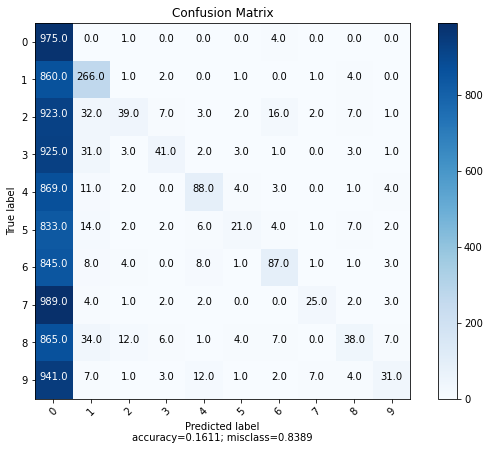

In [32]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(confusion_matrix, 
                      normalize    = False,
                      target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title        = "Confusion Matrix")

- Có vẻ mô hình phân loại tốt nhỉ !!!